In [20]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [10,7]
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 2 Linear regression with one variable

## 2.1 Plotting the Data

In [21]:
data = np.loadtxt('ex1_octave/ex1data1.txt', delimiter=',')
x, y = data[:,0], data[:,1]
m = len(y)

In [22]:
print(x)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


In [23]:
print(y)

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705]


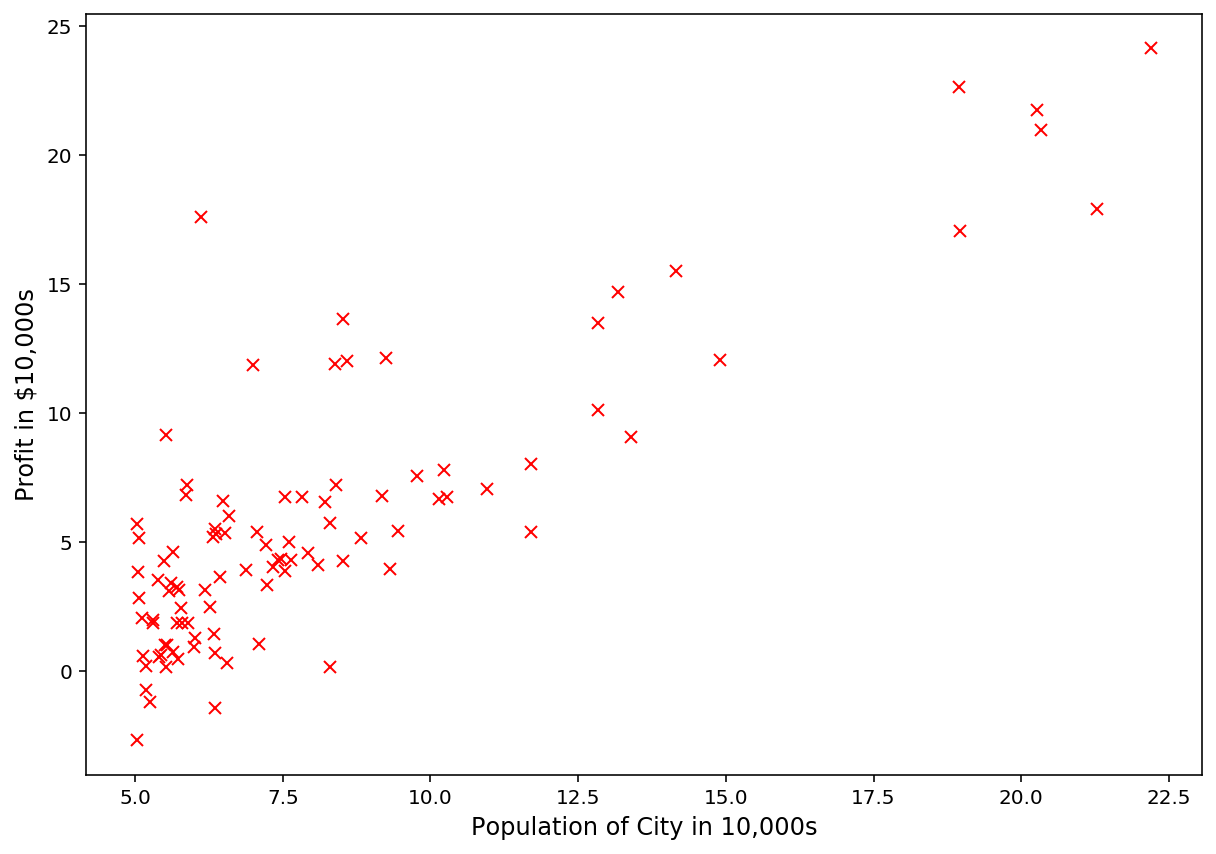

In [26]:
plt.figure(figsize=(10,7))
plt.plot(x, y, 'x', color='r')
plt.xlabel(r'Population of City in 10,000s')
plt.ylabel(r'Profit in $10,000s');

## 2.2 Gradient Descent

In [10]:
def computeCost(X, y, theta):
    
    dt = np.dot(X, theta) - y
    
    return np.dot(dt, dt) / 2 / m

In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    # initialize some numbers #
    
    # number of training samples
    m = len(y)
    
    # cost function history
    J_history = np.zeros(num_iters)
    
    # start loop
    theta_new = theta.copy()
    for ii in range(num_iters):
        
        # update theta
        theta_new -= alpha * np.dot(X.T, (np.dot(X,theta_new) - y)) / m
        
        # store cost function
        J_history[ii] = computeCost(X, y, theta_new)
        
    return theta_new, J_history      

In [12]:
# initialize data array
X = np.ones((m, 2))
X[:,1] = data[:,0]

# initalize model
theta = np.zeros(2)

### 2.2.3 Computing the cost $J(\theta)$

In [13]:
# compute the cost function for theta = zeros
computeCost(X, y, theta)

32.07273387745567

### 2.2.4 Gradient descent

In [14]:
# algorithm parameters
alpha = 0.01
iterations = 1500

# run gradient descent
theta_new, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [15]:
theta_new

array([-3.63029144,  1.16636235])

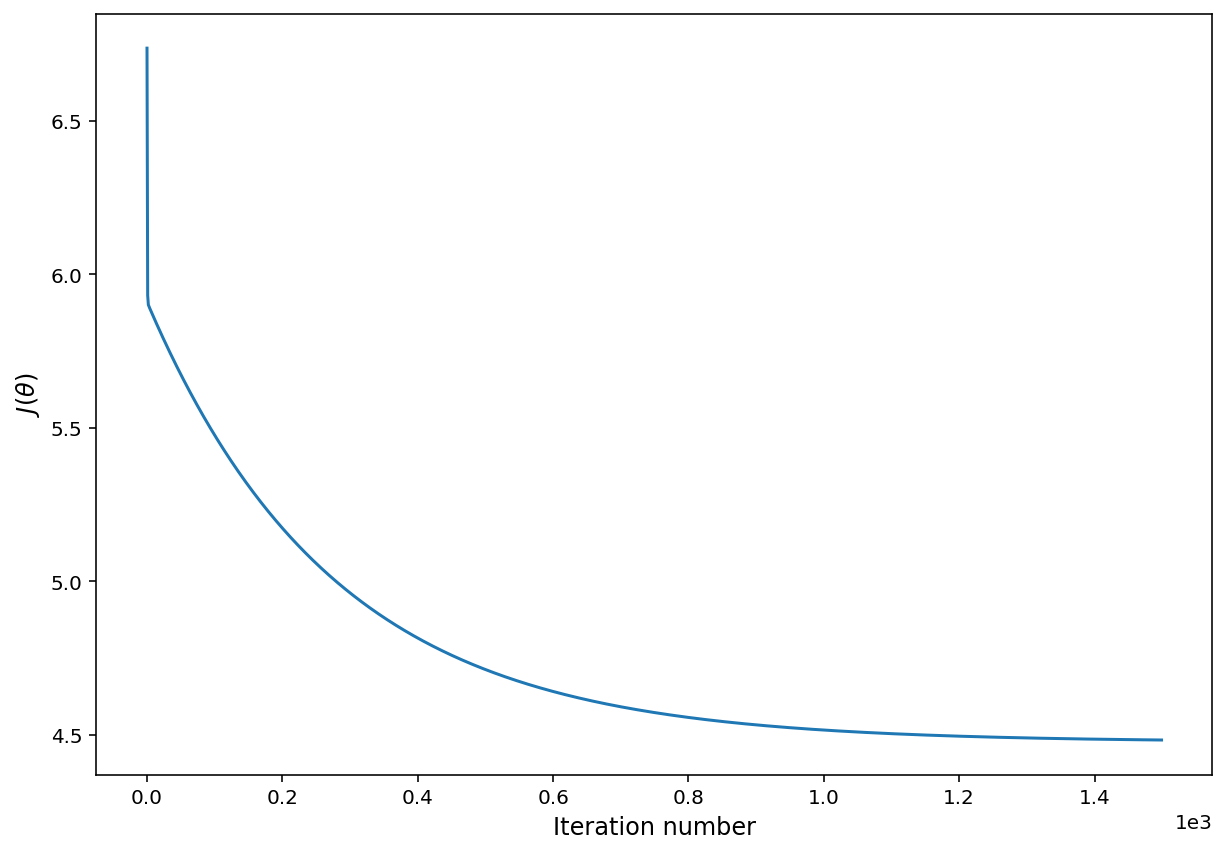

In [18]:
# Plot cost function vs. iteration
plt.figure(figsize=(10,7))
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$');

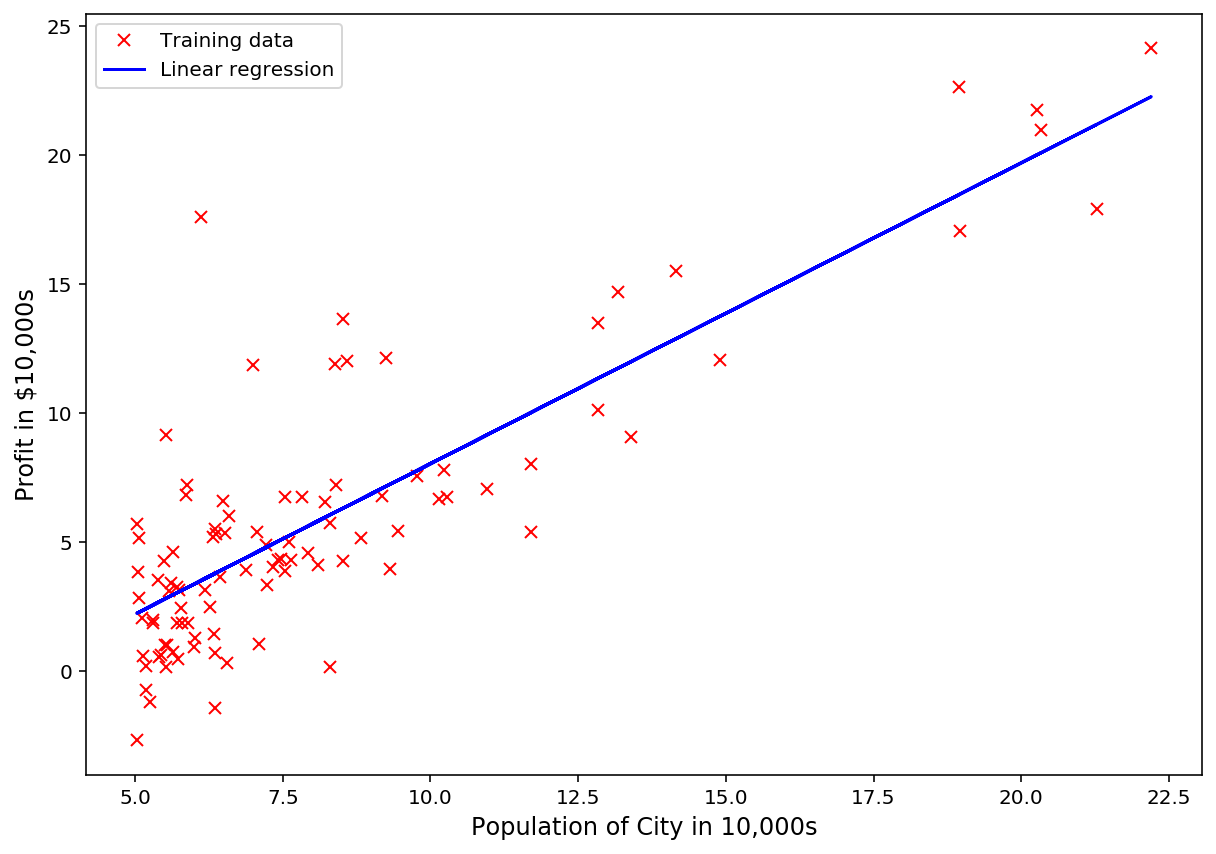

In [28]:
# plot data along with Linear regression
plt.figure(figsize=(10,7))
plt.plot(x, y, 'x', color='r', label='Training data')
plt.plot(x, np.dot(X, theta_new), label='Linear regression', color='b')
plt.xlabel(r'Population of City in 10,000s')
plt.ylabel(r'Profit in $10,000s')
plt.legend(loc='best');

## 2.4 Visualizing $J(\theta)$

In [29]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J values
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# fill in J values
for ii, t0 in enumerate(theta0_vals):
    for jj, t1 in enumerate(theta1_vals):
        t = np.array([t0, t1])
        J_vals[ii,jj] = computeCost(X, y, t)

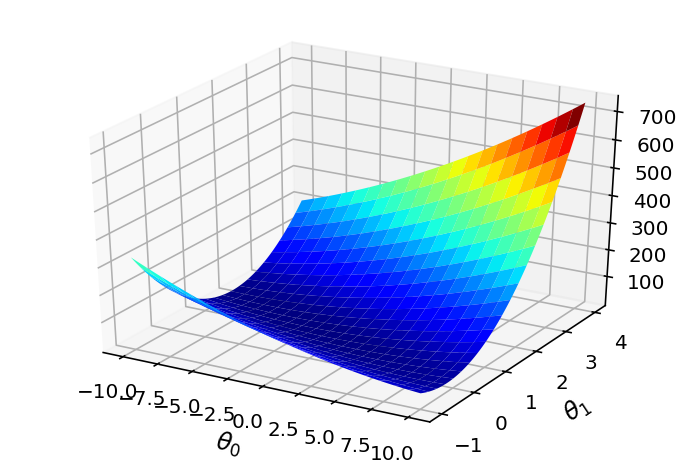

In [31]:
# make Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

surf = ax.plot_surface(T0, T1, J_vals.T, cmap='jet', rstride=5, 
                       cstride=5, antialiased=True)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$');

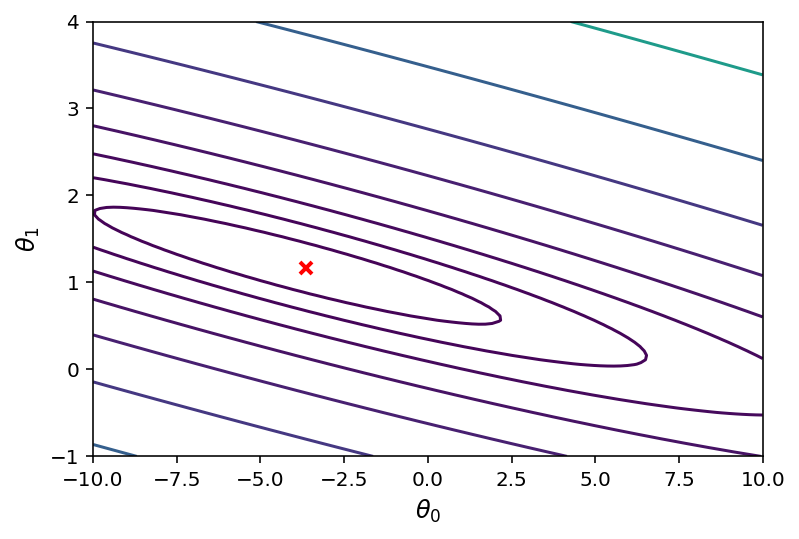

In [33]:
# make contour plot
plt.contour(T0, T1, J_vals.T, np.logspace(-2, 3, 20))
plt.plot(theta_new[0], theta_new[1], 'x', color='r', mew=2)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$');

# 3 Linear regression with multiple variables

In [34]:
# read in the data
data = np.loadtxt('ex1_octave/ex1data2.txt', delimiter=',')
x, y = data[:,:-1], data[:,-1]
m = len(y)

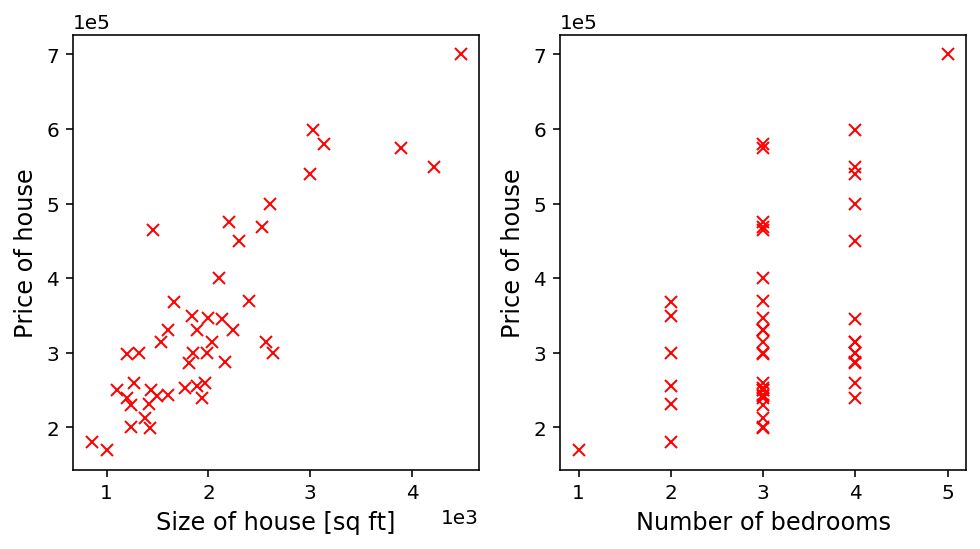

In [36]:
# plot the data
fit, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot(x[:,0], y, 'x', color='r')
ax[0].set_xlabel(r'Size of house [sq ft]')
ax[0].set_ylabel(r'Price of house')

ax[1].plot(x[:,1], y, 'x', color='r')
ax[1].set_xlabel(r'Number of bedrooms')
ax[1].set_ylabel(r'Price of house');

## 3.1 Feature Normalization

In [37]:
def featureNormalize(X):
    
    # compute mean and standard deviation
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma    

## 3.2 Gradient Descent

In [38]:
# normalize features
X, mu, sigma = featureNormalize(x)

# add mean
X = np.hstack((np.ones((X.shape[0],1)), X))

In [39]:
# gradient descent values
alpha = 0.01
iterations = 400
theta = np.zeros(3)

# run gradient descent
theta_new, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [40]:
theta_new

array([334302.06399328,  99411.44947359,   3267.01285407])

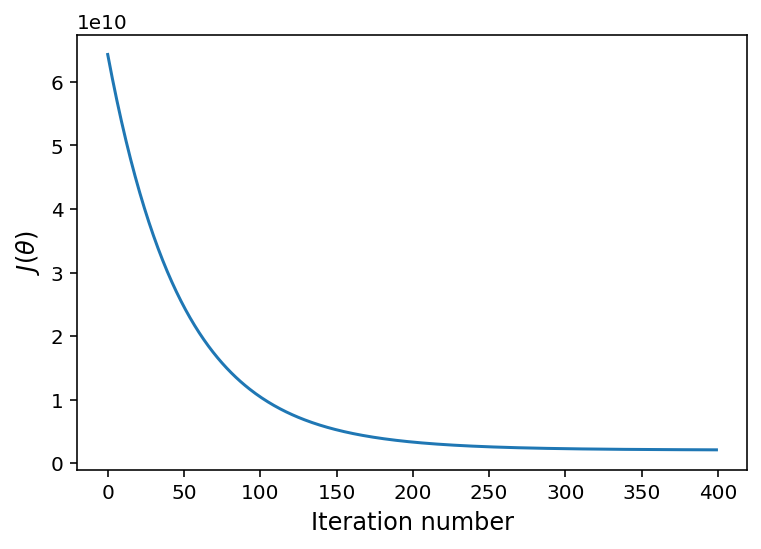

In [41]:
# Plot cost function vs. iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$');

In [43]:
# Estimate the price of a 1650 sq-ft, 3 br house
vals = (np.array([1650, 3]) - mu) / sigma
vals = np.hstack((np.array([1]), vals))

predict = np.dot(theta_new, vals)
print('A 1650 sq-ft 3 br house will cost $%6.2f' % predict)

A 1650 sq-ft 3 br house will cost $289221.55


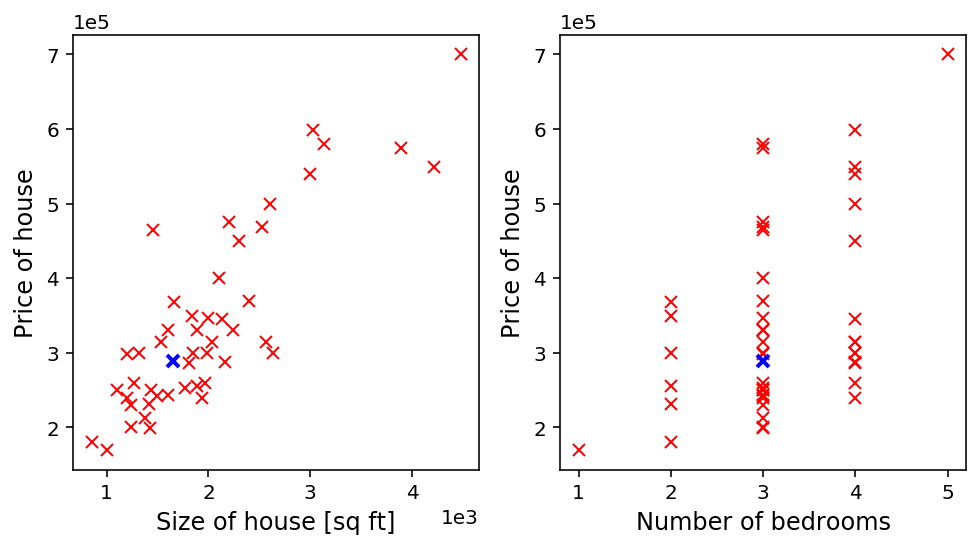

In [45]:
# plot the data and prediction
fit, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot(x[:,0], y, 'x', color='r')
ax[0].plot(1650, predict, 'x', color='b', mew=2)
ax[0].set_xlabel(r'Size of house [sq ft]')
ax[0].set_ylabel(r'Price of house')

ax[1].plot(x[:,1], y, 'x', color='r')
ax[1].plot(3, predict, 'x', color='b', mew=2)
ax[1].set_xlabel(r'Number of bedrooms')
ax[1].set_ylabel(r'Price of house');

### 3.2.1 Selecting Learning Rates

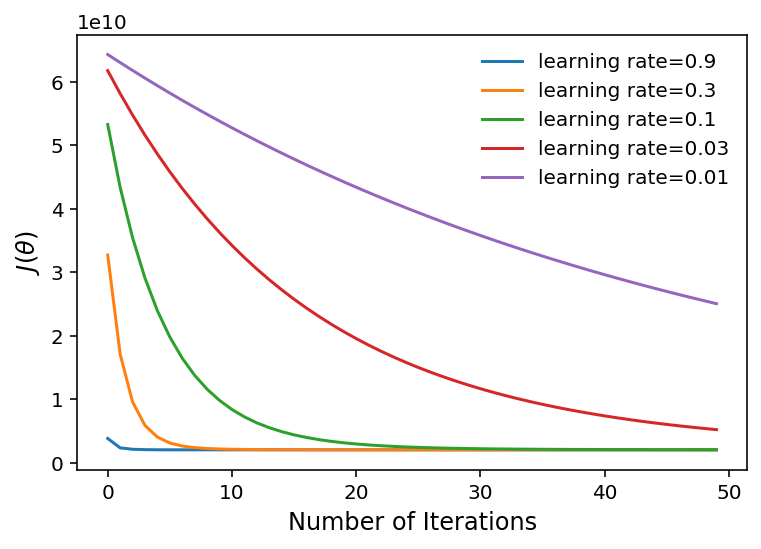

In [46]:
alphas = [0.9, 0.3, 0.1, 0.03, 0.01]
for alpha in alphas:
    theta_new, J_history = gradientDescent(X, y, theta, alpha, 50)
    plt.plot(J_history, label='learning rate={0}'.format(alpha))

plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'Number of Iterations')
plt.legend(loc='best', frameon=False)
    

## 3.2 Normal Equations

In [47]:
def normalEqn(X, y):
    
    inv_term = np.linalg.inv(np.dot(X.T, X))
    theta = np.dot(inv_term, np.dot(X.T, y))
    
    return theta

In [48]:
# re-compute X with out normalization
X = np.hstack((np.ones((x.shape[0],1)), x))

# get solution with normal equation
theta_norm = normalEqn(X, y)

In [49]:
# Estimate the price of a 1650 sq-ft, 3 br house
vals = np.array([1650, 3])
vals = np.hstack((np.array([1]), vals))

# this is the same answer as above if run for more iterations
predict = np.dot(theta_norm, vals)
print('A 1650 sq-ft 3 br house will cost $%6.2f' % predict)

A 1650 sq-ft 3 br house will cost $293081.46
